<a href="https://colab.research.google.com/github/shailaja-mahara/masters-thesis/blob/main/JWSTfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from astropy.io import fits
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.wcs import WCS
import re
import scipy as sp
from IPython.display import clear_output # Import the clear_output function



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Filename: /content/drive/MyDrive/thesisDocuments/jw01783-o908_t016_miri_f560w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   ()      
  1  SCI           1 ImageHDU        75   (3469, 1073)   float32   
  2  ERR           1 ImageHDU        10   (3469, 1073)   float32   
  3  CON           1 ImageHDU        10   (3469, 1073, 1)   int32   
  4  WHT           1 ImageHDU         9   (3469, 1073)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (3469, 1073)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (3469, 1073)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (3469, 1073)   float32   
  8  HDRTAB        1 BinTableHDU    844   20R x 417C   [23A, 5A, 3A, 48A, 7A, 13A, 3A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 72A, 13A, 2A, D, 8A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 12A, 19A, 2A, 26A, 20A, 27A, 12A, K, L, L, L, L, 11A, 4A, 5A, D, D, D, D, D, D, 27A, D, D, D, 4A, 8A, D,

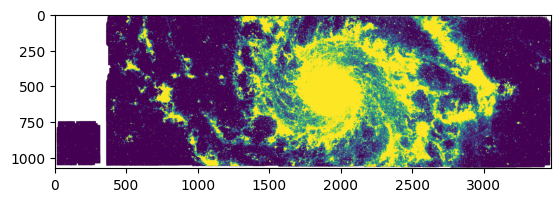

In [72]:
# Plotting the image of the NGC-628 galaxy from MAST data

FILE = '/content/drive/MyDrive/thesisDocuments/jw01783-o908_t016_miri_f560w_i2d.fits'

hdul = fits.open(FILE)
hdul.info()
image= hdul[1].data
print(image)
print(type(image))
print(image.shape)

# show(image)
img = plt.imshow(image, vmin=0.1, vmax=.8)

# # playing with values in the array...for cutting the image in the future
# print("----------")
# print("----------")
# # print(image[0].data)
# # img = plt.imshow(image[0], vmin=0, vmax=.8)
# print(type(image))
# print("----------")
# plt.imshow(image[20:40][0:20], vmin=0, vmax=.8)
# print("----------")
# print("----------")

# print(repr(img))

hdul.close()

(1073, 3469)
nan


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

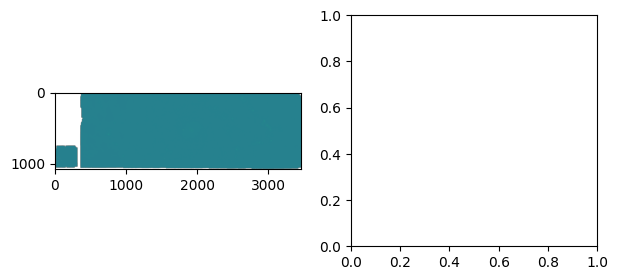

In [76]:
# Fixing the image colours ....TBC


print (image.shape)
print (image.max())




# img = plt.imshow(image, vmin=0.1, vmax=.8)


Set DATE-AVG to '2023-01-15T10:26:26.672' from MJD-AVG.
Set DATE-END to '2023-01-15T12:15:51.322' from MJD-END'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-01-15T10:26:26.672' from MJD-AVG.
Set DATE-END to '2023-01-15T12:15:51.322' from MJD-END'.
Set OBSGEO-B to     7.899584 from OBSGEO-[XYZ].
Set OBSGEO-H to 1682928111.612 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     7.899584 from OBSGEO-[XYZ].
Set OBSGEO-H to 1682928111.612 from OBSGEO-[XYZ]'.


[2717.1488051  2671.95205879 2723.94508827 ... 1286.80240209 1008.30516506
 1059.80923896] [ -45.18840717  -51.34981261  -33.21909075 ... 1106.44416211 1033.89448013
 1053.67777703]


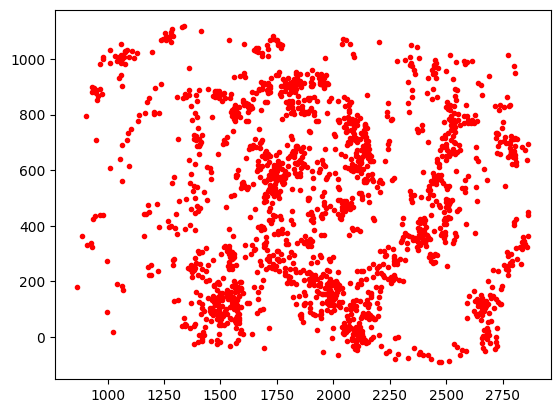

In [ ]:
# Plotting the catalogued superbubbles from the Watkin's data

FILE_superbubbles = '/content/drive/MyDrive/thesisDocuments/jwst_bubble_properties_A.txt'

# catalog = FILE_superbubbles
# catalog.info()

# df = pd.read_csv(FILE_superbubbles, delim_whitespace=True)  # Assuming space as delimiter
df = pd.read_csv(FILE_superbubbles)  # Assuming space as delimitera

# print(df.head()) #Prints the first 5 lines of dataframe.
# print(df.column_name)

# df.columns

ra_dms = df['RA_DMS'].tolist()
dec_dms = df['DEC_DMS'].tolist()

# S: data is converted into a decimal system. This code was provided by Katerina as something she used previously
#sorry i should have explained this. the data is comind in a format that contains days since the 21st march of the year they were taken, plus months out
def ra_dec_to_deg(ra_str, dec_str):
    ra_pattern = re.compile(r'(\d+)d(\d+)m(\d+\.\d+)s')
    dec_pattern = re.compile(r'(\d+)d(\d+)m(\d+\.\d+)s')
    ra_deg, ra_min, ra_sec = map(float, ra_pattern.match(ra_str).groups())
    dec_deg, dec_min, dec_sec = map(float, dec_pattern.match(dec_str).groups())
    ra_decimal = ra_deg + ra_min / 60 + ra_sec / 3600
    dec_decimal = dec_deg + dec_min / 60 + dec_sec / 3600

    return ra_decimal, dec_decimal

ra_degrees = np.zeros(len(df), dtype=float)
dec_degrees = np.zeros(len(df), dtype=float)
for i, row in df.iterrows():
    ra_deg, dec_deg = ra_dec_to_deg(row['RA_DMS'], row['DEC_DMS'])
    ra_degrees[i] = ra_deg
    dec_degrees[i] = dec_deg


w = WCS(hdul[1].header) # WCS is object of astropy.wcs

x, y = w.all_world2pix(ra_degrees, dec_degrees, 1)
# print("----------")
print(x,y)
# print("----------")

# showing catalogued superbubbles from the Watkin's data
a=plt.plot(x, y,".", color='red')



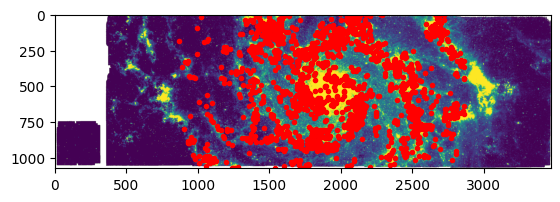

In [ ]:
# Overlapping both plots to show position of bubbles in the image

a=plt.plot(x, y,".", color='red')
b=plt.imshow(image, vmin=0, vmax=.8)

<class 'astropy.wcs.wcs.WCS'>
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 24.1757851164044 15.778267005247692 
CRPIX : 1733.4747337568197 540.3702072225994 
PC1_1 PC1_2  : -0.28414644997216115 0.9587808899682023 
PC2_1 PC2_2  : 0.9587808899682023 0.28414644997216115 
CDELT : 3.08069499796512e-05 3.08069499796512e-05 
NAXIS : 3469  1073
----------
----------
[array([2717.1488051 , 2671.95205879, 2723.94508827, ..., 1286.80240209,
       1008.30516506, 1059.80923896]), array([ -45.18840717,  -51.34981261,  -33.21909075, ..., 1106.44416211,
       1033.89448013, 1053.67777703])]
----------
<class 'numpy.ndarray'>
1694
----------


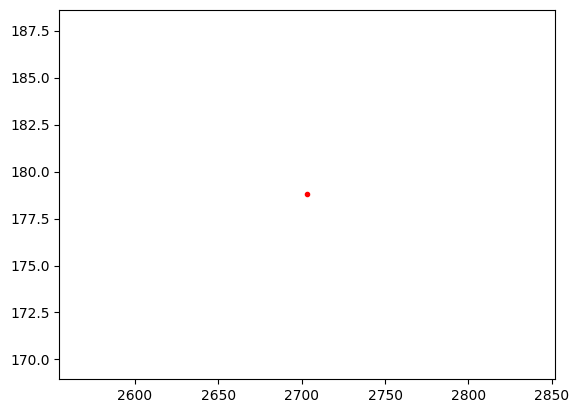

In [ ]:
# how to cut images:


# important = semimajor axis and major axis given in the txt files do not correspond to the pixels. they are in pc(parsecs) which is the measuring
# unit in astronomy(similar to meters) can you  find in the header(metadata) of the txt file how many parsecs are in one pixel?
# in the code below the y_end, y_begin etc are in pixels!!!!!(that correspond to the image)
# to the question in the overleaf "Is there documentation available to process the images from the JWST file?" --->there are different ways that people
# process images. For the particular one, I provided you the steps analytically, plus with discussion on astronomical quantities.
# The following code is NOT the way I wrote to you how to cut the images and I am sure this is why it does not work.
# I gave you the exact command for cutting one(cut_image = image_data[y_begin:y_end, x_begin:x_end]). -> documentation from python is "Slicing of 2D Arrays
# " in this link https://www.stratascratch.com/blog/numpy-array-slicing-in-python/.   but it is not precisely how I instructed it.

# Maybe cut one at random begins and ends and see how it works before you associate it with the .txt file? (also read upper comment for the txt file)


# cut_image = a[100:200, 100:200]

print(type(w))
print(w)
# print(w.ra_degrees)

print("----------")
print("----------")

print(w.all_world2pix(ra_degrees, dec_degrees, 1))

print("----------")
print(type(x))
print(len(x))

plt.plot(x[100], y[100],".", color='red')

print("----------")

# !!
# Question for K: I see the values in the array y are in the negative. How, then, in the above plot
# (from the txt data) is the y axis in the positive>??
# update: ok maybe i figured out the answer...



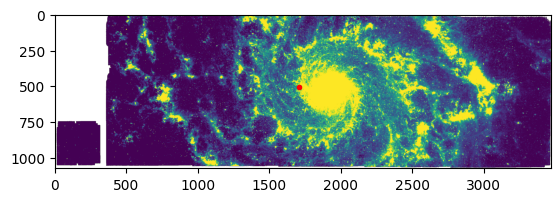

In [ ]:

# showing a singlular point of bubble (the one with both x and y in the positive plot to allign
# with the image)
plt.plot(x[1000], y[1000],".", color='red')


# now adding the image
img = plt.imshow(image, vmin=0, vmax=.8)



---------
<class 'matplotlib.image.AxesImage'>
(1073, 3469)
---------


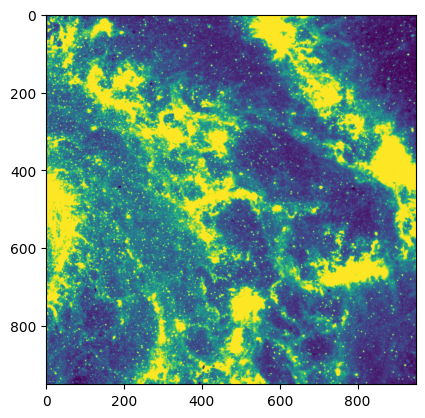

In [ ]:
# Cropping the main image


# b=plt.imshow(image, vmin=0, vmax=.8)

print("---------")
print(type(b))
# print(b)
print(image.shape)
print("---------")

img_crop = image[50:1000, 2050:3000]


# plt.imshow(image, vmin=0, vmax=.8)

plt.imshow(img_crop, vmin=0, vmax=.8)

# !!  Question for K: Here's a funny thing this code is doing.
# I tried slicing on both axis of image[x][y], but changing the first argument plots the image
# from bottom up (on the y axis) and the second argument plots the image from top down (also on
# y axis). Neither arguments are slicing the x axis.
# Not even the third argument, which I did try image[x][y][z]

# Which is why you will notice the below image cutting code is not working as expected.
# I will look into this again after meeting with Kallol tommorow

# Apparently I assumed the the arguments of image are x and y coordinates of the image. They are not. They are norm and cmap.
# I will redo this section

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ROTATED SECTION!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


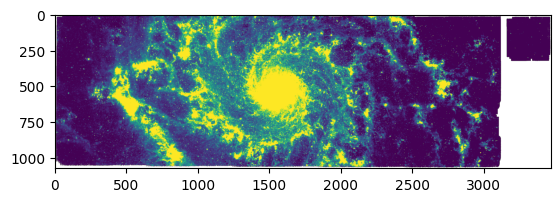

In [ ]:
# Rotate the image 90 degrees

print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ROTATED SECTION!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
image_arr = np.array(image)
image_arr=np.rot90(image_arr)
image_arr=np.rot90(image_arr)
plt.imshow(image_arr, vmin=0, vmax=.8)


------------
------------


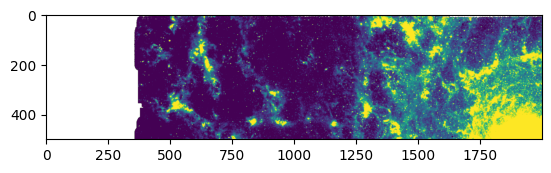

In [ ]:

# new_image = img[x,y] i also did not say that -->cut_image = image_data[y_begin:y_end, x_begin:x_end] y_begin,y_end, x_begin,x_end numbers, the pixels from where till where you want to cut the iamge.
# plt.show(new_image) also you have named the image "image", not "img" that you have named the plot

# playing with image cutting from above

x_using=1000
y_using=1000

crop_size=100

x_lower=x_using-crop_size
x_upper=x_using+crop_size

y_lower=y_using-crop_size
y_upper=y_using+crop_size



print("------------")

print("------------")

# plt.imshow(image[900:1100, 900:1100], vmin=0, vmax=.8)

# cut_image = image[x_lower:x_upper, y_lower:y_upper]
cut_image = image[0:500, 0:2000]
# this is           y  ,    x

# plt.imshow(image, vmin=0, vmax=.8)

plt.imshow(cut_image, vmin=0, vmax=.8)
# plt.show(cut_image)



-----------------
1000
1705.0873987906798
1000
507.28299211304005
-----------------
-----------------
-----------------
1685:1725
487:527
-----------------


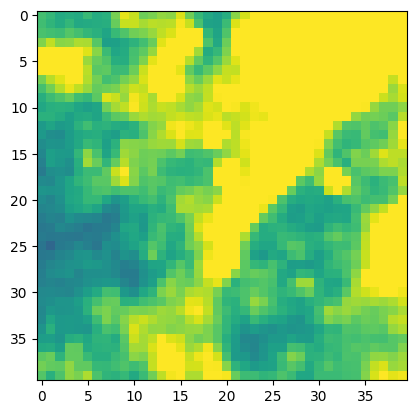

In [ ]:
# Overlaying...

plt.imshow(cut_image, vmin=0, vmax=.8)

print("-----------------")
print(x_using)
print(x[x_using])
print(y_using)
print(y[y_using])

print("-----------------")



crop_size=20

x_lower=int(x[x_using]-crop_size)
x_upper=int(x[x_using]+crop_size)

y_lower=int(y[y_using]-crop_size)
y_upper=int(y[y_using]+crop_size)

print("-----------------")
print("-----------------")
print(str(x_lower)+":"+str(x_upper))
print(str(y_lower)+":"+str(y_upper))

print("-----------------")

cut_image = image[y_lower:y_upper, x_lower:x_upper]


plt.imshow(cut_image, vmin=0, vmax=.8)



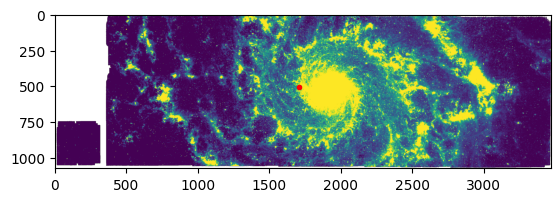

In [ ]:
# check if it's on the correct location



# plt.imshow(image[900:1100, 900:1100], vmin=0, vmax=.8)
plt.plot(x[x_using], y[y_using],".", color='red')

img = plt.imshow(image, vmin=0, vmax=.8)



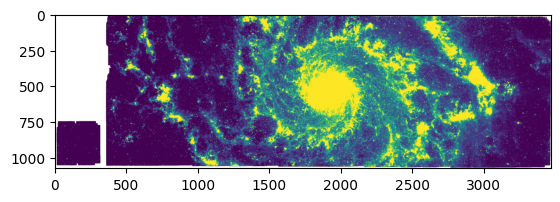

In [ ]:
# Saving in Drive

# !mkdir -p "/content/drive/MyDrive/thesisDocuments/SuperbubbleImages"
img = plt.imshow(image, vmin=0, vmax=.8)

num=5
name="img"+str(num)+".png"
plt.savefig('/content/drive/MyDrive/thesisDocuments/SuperbubbleImages/'+name)
# plt.savefig('/content/drive/MyDrive/thesisDocuments/SuperbubbleImages/image.png')




<ipython-input-17-a961e99f8cd0>:17: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(cut_image, vmin=0, vmax=.8)


2717.148805099887    -45.188407169835386
2671.9520587918123    -51.34981260921995
2723.9450882720653    -33.21909075085432
2513.140453559304    -86.67301749778437
2665.6591727023124    -39.641616458557905
2479.4284396691883    -90.33383665245515
2560.4424254958312    -65.40846456645068
2466.8325202055166    -92.25856506293144
2719.259151932499    -17.41484131702032
2693.2028707710497    -21.520726104052642
2587.614879574895    -49.207399498951986
2570.3279080665366    -47.99828022730253
2660.23333699714    -21.34178911839024
2719.7601079866035    -0.07270843137644079
2680.983309770418    -8.85501132586262
2431.8923006925147    -79.0890807584849
2546.623465670482    -37.83247138632282
2657.029757178426    -4.192948633179867
2688.522120070287    6.954140425000787
2677.16191096403    7.205654985266392
2665.0592445105126    3.6173225876617607
2420.908283780277    -64.24642035927491
2534.032638068016    -27.08634077718534
2684.822773071655    19.431248309510465
2396.0876215425697    -66.175

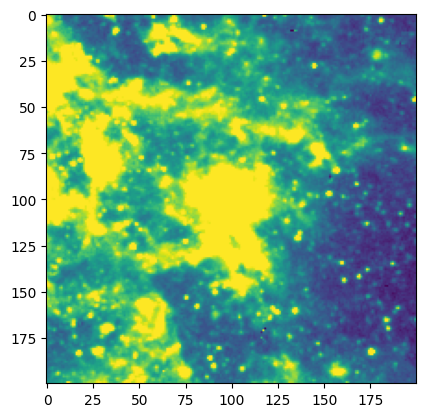

In [ ]:
crop_size=100



for id in range(len(x)):
  # print(str(x[id])+" , "+str(y[id]))
  # clear_output()

  x_lower=int(x[id]-crop_size)
  x_upper=int(x[id]+crop_size)

  y_lower=int(y[id]-crop_size)
  y_upper=int(y[id]+crop_size)

  cut_image = image[y_lower:y_upper, x_lower:x_upper]

  plt.imshow(cut_image, vmin=0, vmax=.8)
  # plt.clf()
  print(x[id] , "  ", y[id])
  name="bubble"+str(id)+".png"
  if id>400:
    break
  # plt.savefig('/content/drive/MyDrive/thesisDocuments/SuperbubbleImages/'+name)



51
bubble51.png


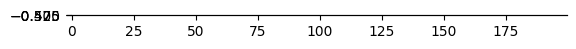

In [ ]:
crop_size=100 #this needs to come from the radius of a bubble



for id in range(len(x)):
  # print(str(x[id])+" , "+str(y[id]))
  clear_output()
  x_lower=int(x[id]-crop_size)
  x_upper=int(x[id]+crop_size)

  y_lower=int(y[id]-crop_size)
  y_upper=int(y[id]+crop_size)

  cut_image = image[y_lower:y_upper, x_lower:x_upper]
  print(id)
  plt.imshow(cut_image, vmin=0, vmax=.8)


  name="bubble"+str(id)+".png"
  # plt.savefig('/content/drive/MyDrive/thesisDocuments/SuperbubbleImages/'+name)

  print(name)
  if id>50:
    break



In [78]:
# Checking for cause of unexpected image data


crop_size=50

for id in range(len(x)):
  if id>300:
    break

  # print("cleaning up...")
  # clear_output()
  plt.clf()

  if y[id]>0 and x[id]>0:

    x_lower=int(x[id]-crop_size)
    x_upper=int(x[id]+crop_size)
    if x_lower<0:
      x_lower=0
    y_lower=int(y[id]-crop_size)
    if y_lower<0:
      y_lower=0
    y_upper=int(y[id]+crop_size)

    cut_image = image[y_lower:y_upper, x_lower:x_upper]

    # print(id,y[id],x[id],y_lower,y_upper,x_lower,x_upper)
    plt.imshow(cut_image, vmin=0, vmax=.8)


    name="bubble"+str(id)+".png"
    print(name,y_lower,y_upper,x_lower,x_upper)
    # plt.savefig('/content/drive/MyDrive/thesisDocuments/SuperbubbleImages/'+name)     #Uncomment this line to save in file
    print("cleaning up...")
    clear_output()
    plt.clf()





<Figure size 640x480 with 0 Axes>

In [79]:
pixel_area_arcsec = 0.0121  # Nominal pixel area in arcsec^2
pixel_to_arcsec = 0.0121**(1/2)  # pixel in arcsec
galaxydistance = 9000  # kpc
arcsec_to_pc = galaxydistance * pixel_to_arcsec / 206265  # Physical Size (pc) = 9,000kpc×0.1arcsec=900pc

In [ ]:

im_width = 75
im_height = 75
use_normalized_coordinates = True

def draw_bounding_boxes_on_image_array(image,
                                       boxes,
                                       color=[],
                                       thickness=1,
                                       display_str_list=()):
  """Draws bounding boxes on image (numpy array).
  Args:
    image: a numpy array object.
    boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
           The coordinates are in normalized format between [0, 1].
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list_list: a list of strings for each bounding box.
  Raises:
    ValueError: if boxes is not a [N, 4] array
  """
  image_pil = PIL.Image.fromarray(image)
  rgbimg = PIL.Image.new("RGBA", image_pil.size)
  rgbimg.paste(image_pil)
  draw_bounding_boxes_on_image(rgbimg, boxes, color, thickness,
                               display_str_list)
  return np.array(rgbimg)


def draw_bounding_boxes_on_image(image,
                                 boxes,
                                 color=[],
                                 thickness=1,
                                 display_str_list=()):
  """Draws bounding boxes on image.
  Args:
    image: a PIL.Image object.
    boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
           The coordinates are in normalized format between [0, 1].
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: a list of strings for each bounding box.

  Raises:
    ValueError: if boxes is not a [N, 4] array
  """
  boxes_shape = boxes.shape
  if not boxes_shape:
    return
  if len(boxes_shape) != 2 or boxes_shape[1] != 4:
    raise ValueError('Input must be of size [N, 4]')
  for i in range(boxes_shape[0]):
    draw_bounding_box_on_image(image, boxes[i, 1], boxes[i, 0], boxes[i, 3],
                               boxes[i, 2], color[i], thickness, display_str_list[i])

def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color='red',
                               thickness=1,
                               display_str=None,
                               use_normalized_coordinates=True):
  """Adds a bounding box to an image.
  Bounding box coordinates can be specified in either absolute (pixel) or
  normalized coordinates by setting the use_normalized_coordinates argument.
  Args:
    image: a PIL.Image object.
    ymin: ymin of bounding box.
    xmin: xmin of bounding box.
    ymax: ymax of bounding box.
    xmax: xmax of bounding box.
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: string to display in box
    use_normalized_coordinates: If True (default), treat coordinates
      ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
      coordinates as absolute.
  """
  draw = PIL.ImageDraw.Draw(image)
  im_width, im_height = image.size
  if use_normalized_coordinates:
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
  else:
    (left, right, top, bottom) = (xmin, xmax, ymin, ymax)
  draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=thickness, fill=color)



In [ ]:
import os, re, time, json
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import numpy as np
import pandas as pd
#import supervision as sv
from scipy import ndimage, misc
#import supervision as sv


import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

print("Tensorflow version " + tf.__version__)


plt.rcParams['figure.figsize'] = (10, 8)

import torch
import cv2
import numpy as np
from torchvision import models, transforms
from PIL import Image

from skimage.restoration import denoise_bilateral
#from skimage.restoration import denoise_tv_chambolle


# Load pretrained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode

# Load and transform the image

SOURCE_DIR = "PATH"
TRAINING_INPUT_DIR = "PATH"
TRAINING_OUTPUT_DIR = "PATH"
TESTING_INPUT_DIR = "PATH"
TESTING_OUPUT_DIR = "PATH"

VALIDATION_INPUT_DIR = "PATH"
VALIDATION_OUPUT_DIR = "PATH"



files = []

for filename in os.listdir(TRAINING_INPUT_DIR):
    image = Image.open(os.path.join(TRAINING_INPUT_DIR, filename))

    # Replace 'multichannel' with 'channel_axis'
    # If your image is grayscale, set channel_axis=None.
    # If it has color channels (e.g., RGB), set channel_axis=-1

    image_np = np.array(image)
    #image_denoised = denoise_bilateral(image_np, channel_axis=None).astype(np.float32)
    image_denoised = denoise_tv_chambolle(image_np, channel_axis=None).astype(np.float32)
      # Assuming grayscale

    #image = Image.open("/content/output6.png")
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image_denoised).unsqueeze(0).type(torch.float32)

    # Perform inference
    with torch.no_grad():
        prediction = model(image_tensor)

    # Draw bounding boxes on the image using OpenCV
    boxes = prediction[0]['boxes'].cpu().numpy()
    # Ensure image_cv is a numeric array by converting it to uint8
    image_cv = np.array(image.convert('RGB')).astype(np.uint8)
    # Convert to BGR after ensuring image_cv is a numeric array
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)

    for box in boxes:
        x_min, y_min, x_max, y_max = box
        cv2.rectangle(image_cv, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

    # Display the result
    # Use a supported image display function (cv2.imshow might not work in certain colab environments)
    from google.colab.patches import cv2_imshow
    cv2_imshow(image_cv)
    cv2.imwrite(os.path.join(TRAINING_INPUT_DIR, filename), image_cv)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()